<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Translated and edited by Alena Sharlo, [Yury Kashnitsky](https://yorko.github.io), [Artem Trunov](https://www.linkedin.com/in/datamove), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Topic 2. Visual data analysis in Python
## <center>Part 2. Overview of Seaborn, Matplotlib and Plotly libraries

### Article outline

1. [Dataset](#1.-Dataset)
2. [DataFrame.plot()](#2.-DataFrame.plot)
3. [Seaborn](#3.-Seaborn)
4. [Plotly](#4.-Plotly)
5. [Demo assignment](#5.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset

First, we will set up our environment by importing all necessary libraries. We will also change the display settings to better show plots.

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

Now, let’s load the dataset that we will be using into a `DataFrame`. I have picked a dataset on video game sales and ratings from [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).
Some of the games in this dataset lack ratings; so, let’s filter for only those examples that have all of their values present.

In [2]:
df = pd.read_csv("../../data/video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


Next, print the summary of the `DataFrame` to check data types and to verify everything is non-null.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


We see that `pandas` has loaded some of the numerical features as `object` type. We will explicitly convert those columns into `float` and `int`.

In [4]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

The resulting `DataFrame` contains 6825 examples and 16 columns. Let’s look at the first few entries with the `head()` method to check that everything has been parsed correctly. To make it more convenient, I have listed only the variables that we will use in this notebook.

In [5]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot()

Before we turn to Seaborn and Plotly, let’s discuss the simplest and often most convenient way to visualize data from a `DataFrame`: using its own `plot()` method.

As an example, we will create a plot of video game sales by country and year. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the `plot()` method on the resulting `DataFrame`.

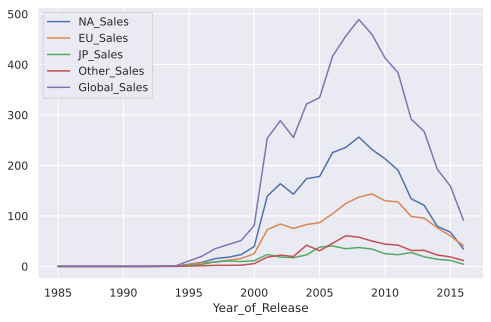

In [6]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

Note that the implementation of the `plot()` method in `pandas` is based on `matplotlib`.

Using the `kind` parameter, you can change the type of the plot to, for example, a *bar chart*. `matplotlib` is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to find the corresponding parameters. For example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis (for vertical plots):

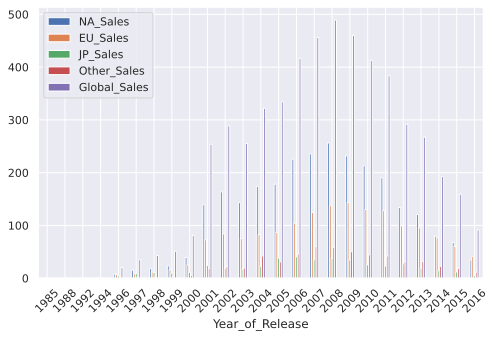

In [7]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

## 3. Seaborn

Now, let's move on to the `Seaborn` library. `seaborn` is essentially a higher-level API based on the `matplotlib` library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare `matplotlib`) require quite a large amount of code.

#### pairplot()

Let's take a look at the first of such complex plots, a *pairwise relationships plot*, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

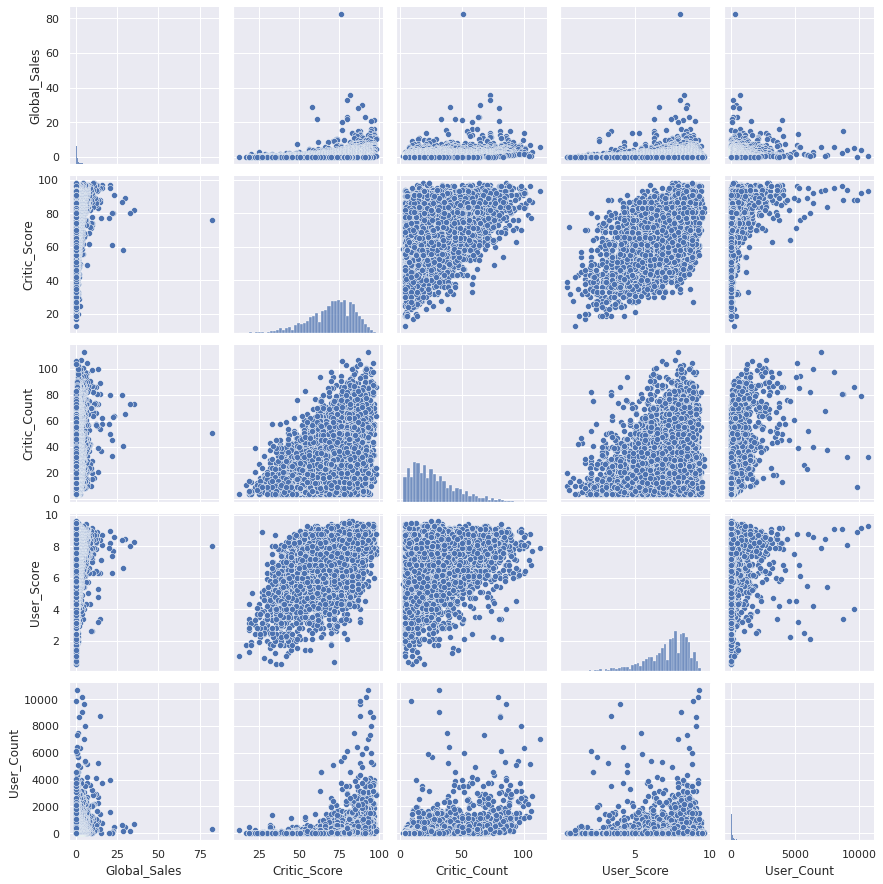

In [8]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

As you can see, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

#### distplot()

It is also possible to plot a distribution of observations with `seaborn`'s `distplot()`. For example, let's look at the distribution of critics' ratings: `Critic_Score`. By default, the plot displays a histogram and the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).

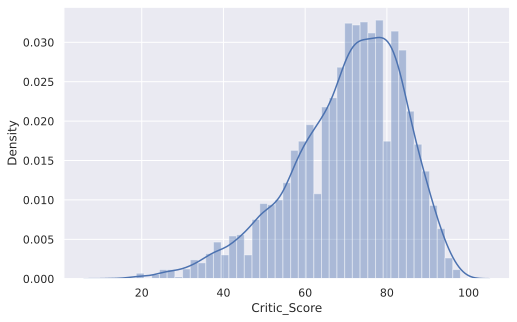

In [9]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df["Critic_Score"]);

#### jointplot()

To look more closely at the relationship between two numerical variables, you can use *joint plot*, which is a cross between a scatter plot and histogram. Let's see how the `Critic_Score` and `User_Score` features are related.

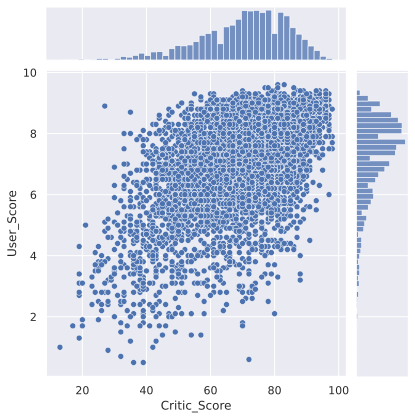

In [10]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter");

#### boxplot()

Another useful type of plot is a *box plot*. Let's compare critics' ratings for the top 5 biggest gaming platforms.

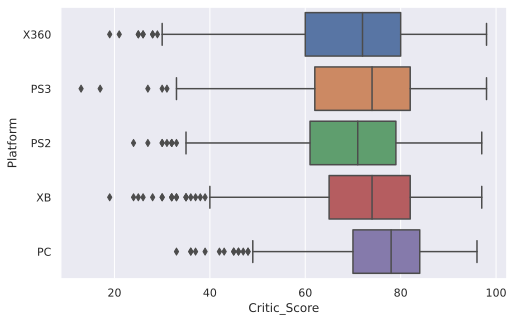

In [11]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length determined by the $25\% \, (\text{Q1})$ and $75\% \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall out of the range bounded by the whiskers are plotted individually.

#### heatmap()

The last type of plot that we will cover here is a *heat map*. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

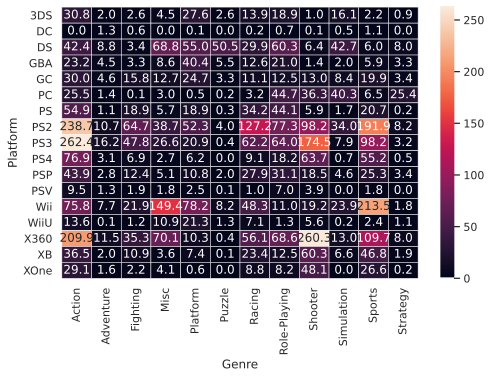

In [12]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

## 4. Plotly

We have examined some visualization tools based on the `matplotlib` library. However, this is not the only option for plotting in `Python`. Let’s take a look at the `plotly` library. Plotly is an open-source library that allows creation of interactive plots within a Jupyter notebook without having to use Javascript.

The real beauty of interactive plots is that they provide a user interface for detailed data exploration. For example, you can see exact numerical values by mousing over points, hide uninteresting series from the visualization, zoom in onto a specific part of the plot, etc.

Before we start, let’s import all the necessary modules and initialize `plotly` by calling the `init_notebook_mode()` function.

In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

#### Line plot

First of all, let’s build a *line plot* showing the number of games released and their sales by year.

In [14]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

`Figure` is the main class and a work horse of visualization in `plotly`. It consists of the data (an array of lines called `traces` in this library) and the style (represented by the `layout` object). In the simplest case, you may call the `iplot` function to return only `traces`.

The `show_link` parameter toggles the visibility of the links leading to the online platform `plot.ly` in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing `show_link=False` to prevent accidental clicks on those links.

In [16]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

As an option, you can save the plot in an html file:

In [17]:
plotly.offline.plot(fig, filename="years_stats.html", show_link=False);

#### Bar chart

Let's use a *bar chart* to compare the market share of different gaming platforms broken down by the number of new releases and by total revenue.

In [18]:
# Do calculations and prepare the dataset
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [19]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

#### Box plot

`plotly` also supports *box plots*. Let’s consider the distribution of critics' ratings by the genre of the game.

In [20]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
iplot(data, show_link=False)

Using `plotly`, you can also create other types of visualization. Even with default settings, the plots look quite nice. Additionally, the library makes it easy to modify various parameters: colors, fonts, captions, annotations, and so on.

## 5. Demo assignment
To practice with visual data analysis, you can complete [this assignment](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data) where you'll be analyzing cardiovascular disease data.

## 6. Useful resources
- The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323210/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/vm63p8Od0bM) on YouTube
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.
- Also, see the [documentation](http://scikit-learn.org/stable/modules/manifold.html) on Manifold Learning in `scikit-learn`.
- Efficient t-SNE implementation [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- "How to Use t-SNE Effectively", [Distill.pub](https://distill.pub/2016/misread-tsne/).